# AsBCデザイン（3要因の混合分散分析)を行うための前処理を行うプログラム 

###監視あり(10名), 監視なし(10名), 合計20名の参加者から得られた実験結果のデータ整理を行っています。
</br>
</br>
要因A：　監視あり or なし → 2要素
</br>
要因B：　正像 or 鏡像 → 2要素
</br>
要因C：　提示角度(0, 45, 90, 135, 180, 225, 270, 315) → 8要素
</br>
</br>

## 同時に整理したデータを用いて図も作成

### **※ windows と Macのencodeの問題で、環境によって文字化けする可能性があるので注意です。Macに合わせています。**

------------------------------------------------------------------------------------------------------

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import re
import copy
import statistics

# 監視あり

In [ ]:
# 被験者のリスト 行名
userList = ["User01", "User02", "User03", "User04", "User05", "User06", "User07", "User08", "User09", "User10"]


# 角度(8要素)と正像or鏡像(2要素)　　列名
columns = [
              "normal_0", "normal_45", "normal_90", "normal_135", "normal_180", "normal_225", "normal_270", "normal_315", 
              "mirror_0", "mirror_45", "mirror_90", "mirror_135", "mirror_180", "mirror_225", "mirror_270", "mirror_315"
            ]

#　後で分散分析用に平均値をまとめて出力するための初期DataFrameを作成
df_toCSV = pd.DataFrame(columns = columns, index=userList)
# df_toCSV.head(10)

# ミスの回数をまとめるための初期DataFrameを作成
df_miss_toCSV = pd.DataFrame(columns = columns, index=userList)
# df_miss_toCSV.head(10)


In [ ]:
from contextlib import nullcontext
for i in range(len(userList)):

  normal_dict = {"normal_0": 0, "normal_45": 0, "normal_90": 0, "normal_135": 0,
      "normal_180": 0, "normal_225": 0, "normal_270": 0, "normal_315": 0}

  mirror_dict = {"mirror_0": 0, "mirror_45": 0, "mirror_90": 0, "mirror_135": 0,
      "mirror_180": 0, "mirror_225": 0, "mirror_270": 0, "mirror_315": 0}

  # 合計値
  sum_value_normal = copy.deepcopy(normal_dict)
  sum_value_mirror = copy.deepcopy(mirror_dict)

  # 合計インデックス
  sum_index_normal = copy.deepcopy(normal_dict)
  sum_index_mirror = copy.deepcopy(mirror_dict)

  #上のリストはここで平均値を算出するため
  Mean_value_normal = copy.deepcopy(normal_dict)
  Mean_value_mirror = copy.deepcopy(mirror_dict)


  # ミス回数 (使用するか分からないが, 念の為記録しておく) 
  total_miss_normal = copy.deepcopy(normal_dict)
  total_miss_mirror = copy.deepcopy(mirror_dict)

  df = pd.read_csv("{}.csv".format(userList[i]))
  # print(df.columns.values) #列名の確認

  for j in range(len(df["correct"])):
    # if df["correct"][j] != None or df["correct"][j] != bool(float('nan')):
    if np.isnan(df["correct"][j]):
      continue
    else:
      deg = str(int(df["deg"][j]))

      #試行が失敗の時
      if df["correct"][j] == False:
        #本当は正像であるのに鏡像であると反応してしまった場合
        if df["response"][j] == "d": 
          total_miss_normal["normal_{}".format(deg)] += 1

        #本当は鏡像であるのに正像と反応してしまった場合
        else: 
          total_miss_mirror["mirror_{}".format(deg)] += 1

        continue

      #試行が成功の時のみ解析に用いる
      else:
        # 鏡像の時
        if df["response"][j] == "d": 
          sum_value_mirror["mirror_{}".format(deg)] += float(df["duration"][j])
          sum_index_mirror["mirror_{}".format(deg)] += 1

        # 正像の時
        else: 
          sum_value_normal["normal_{}".format(deg)] += float(df["duration"][j])
          sum_index_normal["normal_{}".format(deg)] += 1
    
  normal_keys = list(normal_dict.keys())
  mirror_keys = list(mirror_dict.keys())

  for j, normal_key in enumerate(normal_keys):
    Mean_value_normal[normal_key] = sum_value_normal[normal_key] / sum_index_normal[normal_key]
    df_toCSV[normal_key][i] = Mean_value_normal[normal_key]
    df_miss_toCSV[normal_key][i] = total_miss_normal[normal_key]

  for j, mirror_key in enumerate(mirror_keys):
    Mean_value_mirror[mirror_key] = sum_value_mirror[mirror_key] / sum_index_mirror[mirror_key]
    df_toCSV[mirror_key][i] = Mean_value_mirror[mirror_key]
    df_miss_toCSV[mirror_key][i] = total_miss_mirror[mirror_key]

df_toCSV.to_csv("monitored.csv")
df_toCSV.head(10)

,normal_0,normal_45,normal_90,normal_135,normal_180,normal_225,normal_270,normal_315,mirror_0,mirror_45,mirror_90,mirror_135,mirror_180,mirror_225,mirror_270,mirror_315
User01,678.431444,659.1594,686.340875,776.249875,940.508636,830.376875,838.8617,674.0702,664.1602,718.620667,756.477091,834.909727,888.4891,906.436,789.017111,736.989125
User02,1016.495,1024.955111,934.8521,954.813625,1256.737333,969.559667,1037.295455,1001.6117,955.1493,1025.0048,951.693818,1342.935273,1117.881,1305.2297,1057.5783,1117.5105
User03,1349.8328,1495.578182,2032.616333,1975.171222,2196.188333,1966.564,1553.567455,1581.7711,1076.8674,1670.502889,1770.0383,2013.434333,2165.102222,1867.695545,1853.517667,1662.569727
User04,969.129444,1071.0668,1598.621667,1448.57,1676.807167,2039.1725,1262.742667,1060.993375,1434.826625,1283.326667,1583.289111,1390.2165,1853.169714,1568.7612,1586.431714,1177.581571
User05,1025.1724,915.6492,1031.703,1253.9664,1703.003428,1484.855857,1053.423667,969.0244,868.8218,943.1026,1215.617,1435.020555,2158.304667,1418.4654,1065.8986,939.502
User06,745.2395,879.488818,850.8387,1163.121222,1267.761909,1195.362444,897.500727,738.3202,761.2539,937.4703,949.551,1574.965444,1308.025625,1544.907875,1023.647,847.376091
User07,610.7886,735.946455,983.964,951.916,1145.473143,830.614,836.201818,643.7025,810.4569,1138.7325,990.200364,1198.272444,1387.951,991.529727,859.8574,875.2741
User08,541.5,530.181818,654.7,663.5,938.571429,945.25,675.2,605.7,668.0,712.5,853.545455,898.818182,894.5,851.272727,622.7,726.909091
User09,901.125,930.090909,939.6,1006.7,1203.8,1201.857143,1005.818182,919.5,946.111111,940.0,1068.636364,1139.363636,1411.2,1159.6,947.2,922.727273
User10,414.3478,398.170818,453.4524,618.420222,653.610333,599.90125,413.0549,435.3907,432.9702,465.6528,476.9,787.650182,663.881333,537.8745,496.5266,431.195182


,User01,User02,User03,User04,User05,User06,User07,User08,User09,User10
normal_0,678.431444,1016.495,1349.8328,969.129444,1025.1724,745.2395,610.7886,541.5,901.125,414.3478
normal_45,659.1594,1024.955111,1495.578182,1071.0668,915.6492,879.488818,735.946455,530.181818,930.090909,398.170818
normal_90,686.340875,934.8521,2032.616333,1598.621667,1031.703,850.8387,983.964,654.7,939.6,453.4524
normal_135,776.249875,954.813625,1975.171222,1448.57,1253.9664,1163.121222,951.916,663.5,1006.7,618.420222
normal_180,940.508636,1256.737333,2196.188333,1676.807167,1703.003428,1267.761909,1145.473143,938.571429,1203.8,653.610333
normal_225,830.376875,969.559667,1966.564,2039.1725,1484.855857,1195.362444,830.614,945.25,1201.857143,599.90125
normal_270,838.8617,1037.295455,1553.567455,1262.742667,1053.423667,897.500727,836.201818,675.2,1005.818182,413.0549
normal_315,674.0702,1001.6117,1581.7711,1060.993375,969.0244,738.3202,643.7025,605.7,919.5,435.3907
mirror_0,664.1602,955.1493,1076.8674,1434.826625,868.8218,761.2539,810.4569,668.0,946.111111,432.9702
mirror_45,718.620667,1025.0048,1670.502889,1283.326667,943.1026,937.4703,1138.7325,712.5,940.0,465.6528


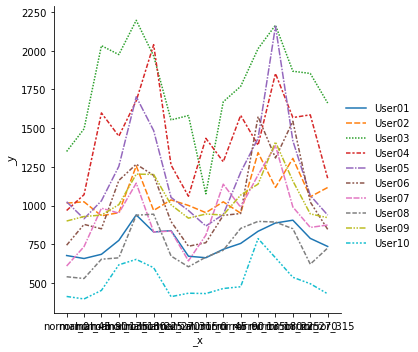

In [ ]:
'''

  全員のデータを突っ込んだ
  これではなんだかよく分からない

'''

dfT = df_toCSV.T
sns.relplot(data=dfT, kind='line')
dfT.head(10)

normal_0       825.206199
normal_45      864.028751
normal_90     1016.668907
normal_135    1081.242857
normal_180    1298.246171
normal_225    1206.351374
normal_270     957.366657
normal_315     863.008417
mirror_0       861.861744
mirror_45      983.491322
mirror_90     1061.594850
mirror_135    1261.558628
mirror_180    1384.850466
mirror_225    1215.177267
mirror_270    1030.237439
mirror_315     943.763466
dtype: float64


Text(0, 0.5, 'mean reaction time [ms]')

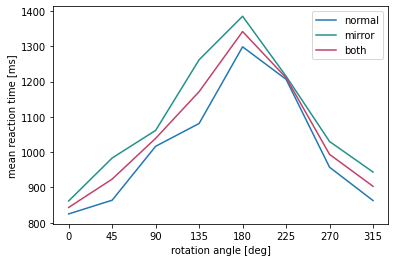

In [ ]:
'''
　　  角度ごとの反応時間の折れ線グラフ

'''

deg_index = ["0", "45", "90", "135", "180", "225", "270", "315"]

df_normal = pd.DataFrame(columns=["normal"], index=deg_index)
df_mirror = pd.DataFrame(columns=["mirror"], index=deg_index)
df_both = pd.DataFrame(columns=["both"], index=deg_index)

mean = dfT.mean(axis=1)
print(mean)

for i in range(len(df_normal)):
  df_normal["normal"][i] = mean[i]
  df_mirror["mirror"][i] = mean[i+8]
  df_both["both"][i] = statistics.mean([mean[i], mean[i+8]])

p_normal = sns.lineplot(data=df_normal, legend="full")
p_mirror = sns.lineplot(data=df_mirror, palette="viridis")
p_both = sns.lineplot(data=df_both, palette="flare")

p_normal.set_xlabel("rotation angle [deg]", fontsize = 10)
p_normal.set_ylabel("mean reaction time [ms]", fontsize = 10)

In [ ]:
'''
　　　　角度ごとの反応時間の折れ線グラフ
　　　　個別に確認

'''

'\n\u3000\u3000\u3000\u3000角度ごとの反応時間の折れ線グラフ\n\u3000\u3000\u3000\u3000個別に確認\n\n'

,normal
0,825.206199
45,864.028751
90,1016.668907
135,1081.242857
180,1298.246171
225,1206.351374
270,957.366657
315,863.008417


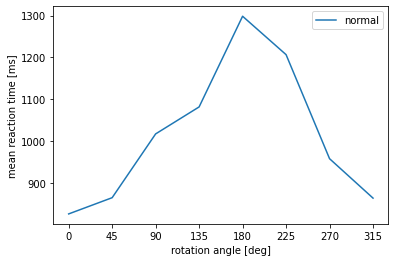

In [ ]:
#正像のみ
p_normal = sns.lineplot(data=df_normal, legend="full")
p_normal.set_xlabel("rotation angle [deg]", fontsize = 10)
p_normal.set_ylabel("mean reaction time [ms]", fontsize = 10)
df_normal.head(10)

,mirror
0,861.861744
45,983.491322
90,1061.59485
135,1261.558628
180,1384.850466
225,1215.177267
270,1030.237439
315,943.763466


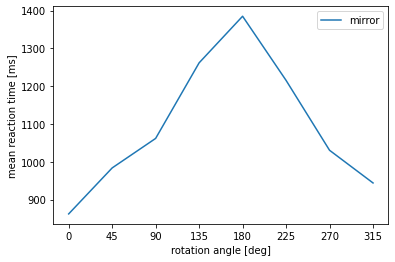

In [ ]:
#鏡像のみ
p_mirror = sns.lineplot(data=df_mirror, legend="full")
p_mirror.set_xlabel("rotation angle [deg]", fontsize = 10)
p_mirror.set_ylabel("mean reaction time [ms]", fontsize = 10)
df_mirror.head(10)

,both
0,843.533971
45,923.760037
90,1039.131879
135,1171.400742
180,1341.548319
225,1210.764321
270,993.802048
315,903.385942


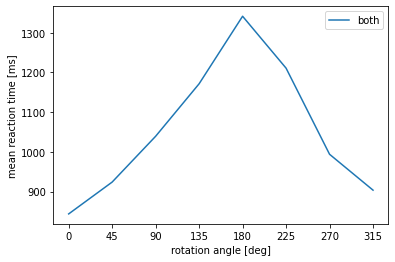

In [ ]:
#正像と鏡像を区別しない
p_both = sns.lineplot(data=df_both, legend="full")
p_both.set_xlabel("rotation angle [deg]", fontsize = 10)
p_both.set_ylabel("mean reaction time [ms]", fontsize = 10)
df_both.head(10)

,normal_0,normal_45,normal_90,normal_135,normal_180,normal_225,normal_270,normal_315,mirror_0,mirror_45,mirror_90,mirror_135,mirror_180,mirror_225,mirror_270,mirror_315
User01,1,1,2,2,1,2,1,0,0,1,0,0,0,1,1,3
User02,0,2,0,2,3,1,0,0,0,0,0,0,1,1,0,1
User03,0,0,1,1,6,1,0,0,0,1,1,2,1,0,1,0
User04,1,1,1,3,6,2,5,2,2,4,2,7,3,1,3,4
User05,0,0,0,0,3,3,1,0,0,0,1,1,4,0,0,0
User06,0,0,0,1,1,1,0,0,0,0,0,2,2,3,0,0
User07,0,0,2,2,5,0,0,0,0,2,0,2,0,0,0,1
User08,0,0,0,0,5,2,1,0,0,0,0,0,0,0,0,0
User09,2,0,0,0,2,3,0,0,1,0,0,0,0,1,0,0
User10,0,0,0,1,0,2,1,0,0,0,1,0,1,1,0,0


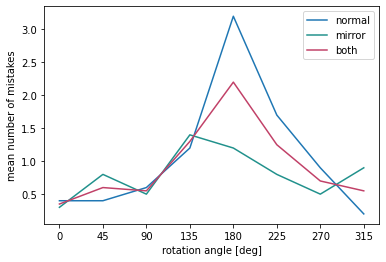

In [ ]:
'''

  ちなみにミスの回数　
  使わなくても良いかもしれないけど、そこそこ綺麗な結果になった

'''
deg_index = ["0", "45", "90", "135", "180", "225", "270", "315"]

df_normal_miss = pd.DataFrame(columns=["normal"], index=deg_index)
df_mirror_miss = pd.DataFrame(columns=["mirror"], index=deg_index)
df_both_miss = pd.DataFrame(columns=["both"], index=deg_index)

mean_miss = df_miss_toCSV.T.mean(axis=1)
# print(mean_miss)

for i in range(len(df_normal_miss)):
  df_normal_miss["normal"][i] = mean_miss[i]
  df_mirror_miss["mirror"][i] = mean_miss[i+8]
  df_both_miss["both"][i] = statistics.mean([mean_miss[i], mean_miss[i+8]])


p_normal = sns.lineplot(data=df_normal_miss, legend="full")
p_mirror = sns.lineplot(data=df_mirror_miss, palette="viridis")
p_both = sns.lineplot(data=df_both_miss, palette="flare")

p_normal.set_xlabel("rotation angle [deg]", fontsize = 10)
p_normal.set_ylabel("mean number of mistakes", fontsize = 10)


df_miss_toCSV.head(10) 


# 監視なし

In [ ]:
# 被験者のリスト 行名
userList = ["User01", "User02", "User03", "User04", "User05", "User06", "User07", "User08", "User09", "User10"]

# 角度(8要素)と正像or鏡像(2要素)　　列名
columns = [
              "normal_0", "normal_45", "normal_90", "normal_135", "normal_180", "normal_225", "normal_270", "normal_315", 
              "mirror_0", "mirror_45", "mirror_90", "mirror_135", "mirror_180", "mirror_225", "mirror_270", "mirror_315"
            ]

#　後で分散分析用に平均値をまとめて出力するための初期DataFrameを作成
df_toCSV = pd.DataFrame(columns = columns, index=userList)
# df_toCSV.head(10)

# ミスの回数をまとめるための初期DataFrameを作成
df_miss_toCSV = pd.DataFrame(columns = columns, index=userList)
# df_miss_toCSV.head(10)


In [ ]:
for i in range(len(userList)):

  normal_dict = {"normal_0": 0, "normal_45": 0, "normal_90": 0, "normal_135": 0,
      "normal_180": 0, "normal_225": 0, "normal_270": 0, "normal_315": 0}

  mirror_dict = {"mirror_0": 0, "mirror_45": 0, "mirror_90": 0, "mirror_135": 0,
      "mirror_180": 0, "mirror_225": 0, "mirror_270": 0, "mirror_315": 0}

  # 合計値
  sum_value_normal = copy.deepcopy(normal_dict)
  sum_value_mirror = copy.deepcopy(mirror_dict)

  # 合計インデックス
  sum_index_normal = copy.deepcopy(normal_dict)
  sum_index_mirror = copy.deepcopy(mirror_dict)

  #上のリストはここで平均値を算出するため
  Mean_value_normal = copy.deepcopy(normal_dict)
  Mean_value_mirror = copy.deepcopy(mirror_dict)


  # ミス回数 (使用するか分からないが, 念の為記録しておく) 
  total_miss_normal = copy.deepcopy(normal_dict)
  total_miss_mirror = copy.deepcopy(mirror_dict)

  df = pd.read_csv("{}.csv".format(userList[i]))
  # print(df.columns.values) #列名の確認

  for j in range(len(df["sender"])):
    if df["sender"][j] == "刺激提示":
      deg = str(int(df["deg"][j]))

      #試行が失敗の時
      if df["correct"][j] == False:
        #本当は正像であるのに鏡像であると反応してしまった場合
        if df["response"][j] == "d": 
          total_miss_normal["normal_{}".format(deg)] += 1

        #本当は鏡像であるのに正像と反応してしまった場合
        else: 
          total_miss_mirror["mirror_{}".format(deg)] += 1

        continue

      #試行が成功の時のみ解析に用いる
      else:
        # 鏡像の時
        if df["response"][j] == "d": 
          sum_value_mirror["mirror_{}".format(deg)] += df["duration"][j]
          sum_index_mirror["mirror_{}".format(deg)] += 1

        # 正像の時
        else: 
          sum_value_normal["normal_{}".format(deg)] += df["duration"][j]
          sum_index_normal["normal_{}".format(deg)] += 1
    
  normal_keys = list(normal_dict.keys())
  mirror_keys = list(mirror_dict.keys())

  for j, normal_key in enumerate(normal_keys):
    Mean_value_normal[normal_key] = sum_value_normal[normal_key] / sum_index_normal[normal_key]
    df_toCSV[normal_key][i] = Mean_value_normal[normal_key]
    df_miss_toCSV[normal_key][i] = total_miss_normal[normal_key]

  for j, mirror_key in enumerate(mirror_keys):
    Mean_value_mirror[mirror_key] = sum_value_mirror[mirror_key] / sum_index_mirror[mirror_key]
    df_toCSV[mirror_key][i] = Mean_value_mirror[mirror_key]
    df_miss_toCSV[mirror_key][i] = total_miss_mirror[mirror_key]

df_toCSV.to_csv("unMonitored.csv")
df_toCSV.head(10)

,normal_0,normal_45,normal_90,normal_135,normal_180,normal_225,normal_270,normal_315,mirror_0,mirror_45,mirror_90,mirror_135,mirror_180,mirror_225,mirror_270,mirror_315
User01,1062.1278,1279.8897,998.2982,1315.5856,1319.199,1290.0609,1029.289444,1166.6383,1313.5543,1606.686333,1434.804222,1882.699444,1966.026,1682.976571,1579.5035,1239.969222
User02,913.6425,932.357889,976.507222,1023.906375,1064.126286,1097.488714,940.364,897.1232,1057.022667,1012.552778,1146.726,1084.573667,1160.450556,1179.261875,1078.8407,1189.533375
User03,480.2758,459.5651,519.799222,651.9268,878.995556,732.734875,571.599556,493.2409,476.8002,514.6099,557.7712,695.7194,848.031111,742.1257,595.941667,551.6991
User04,781.84725,648.39925,820.143889,867.514875,950.05,912.703,903.777625,744.681286,1104.77975,949.263222,946.718333,1031.042143,937.5535,912.211125,1104.735429,808.574375
User05,589.9158,563.052889,618.8024,711.7395,760.638,910.215333,724.671444,589.323,549.9149,654.5257,700.046,792.3297,901.5985,808.788,634.2434,672.4436
User06,781.209889,847.6823,683.592,862.641889,1071.736778,989.3222,736.5058,840.293556,1003.1178,824.959,900.8591,1071.199625,1892.9565,990.160125,870.891444,908.833778
User07,984.8149,717.6304,753.639222,1152.520667,1281.181889,930.833,769.651,718.9001,706.962444,838.7693,2050.824,1025.0947,1094.572,956.759333,902.8592,808.4275
User08,695.867,708.5347,787.9246,929.6885,1147.527143,1084.644125,775.4813,722.8359,791.7885,830.6436,851.3037,1097.2495,1191.833889,909.5507,923.3105,844.106889
User09,684.1717,568.540778,635.0197,1020.6762,1298.99425,1126.442778,933.7722,725.728444,781.9886,762.4529,856.738222,1108.487,1217.201,810.633,859.3983,734.214
User10,856.3291,886.491,912.0625,1011.984125,1243.961429,1040.1756,939.5315,878.9638,996.0361,998.7002,1052.1255,1166.7045,1200.865,1180.8513,1059.699,1031.03


,User01,User02,User03,User04,User05,User06,User07,User08,User09,User10
normal_0,1062.1278,913.6425,480.2758,781.84725,589.9158,781.209889,984.8149,695.867,684.1717,856.3291
normal_45,1279.8897,932.357889,459.5651,648.39925,563.052889,847.6823,717.6304,708.5347,568.540778,886.491
normal_90,998.2982,976.507222,519.799222,820.143889,618.8024,683.592,753.639222,787.9246,635.0197,912.0625
normal_135,1315.5856,1023.906375,651.9268,867.514875,711.7395,862.641889,1152.520667,929.6885,1020.6762,1011.984125
normal_180,1319.199,1064.126286,878.995556,950.05,760.638,1071.736778,1281.181889,1147.527143,1298.99425,1243.961429
normal_225,1290.0609,1097.488714,732.734875,912.703,910.215333,989.3222,930.833,1084.644125,1126.442778,1040.1756
normal_270,1029.289444,940.364,571.599556,903.777625,724.671444,736.5058,769.651,775.4813,933.7722,939.5315
normal_315,1166.6383,897.1232,493.2409,744.681286,589.323,840.293556,718.9001,722.8359,725.728444,878.9638
mirror_0,1313.5543,1057.022667,476.8002,1104.77975,549.9149,1003.1178,706.962444,791.7885,781.9886,996.0361
mirror_45,1606.686333,1012.552778,514.6099,949.263222,654.5257,824.959,838.7693,830.6436,762.4529,998.7002


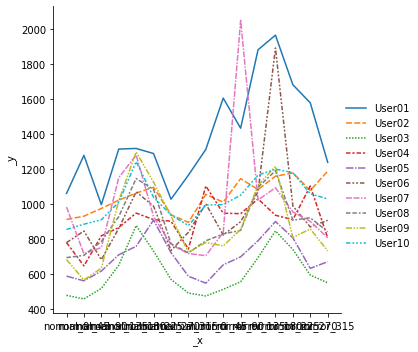

In [ ]:
# 全員のデータ　これではなんだかよく分からない
dfT = df_toCSV.T
sns.relplot(data=dfT, kind='line')
dfT.head(10)

normal_0       783.020174
normal_45      761.214401
normal_90      770.578896
normal_135     954.818453
normal_180    1101.641033
normal_225    1011.462053
normal_270     832.464387
normal_315     777.772849
mirror_0       878.196526
mirror_45      899.316293
mirror_90     1049.791628
mirror_135    1095.509968
mirror_180    1241.108806
mirror_225    1017.331773
mirror_270     960.942314
mirror_315     878.883184
dtype: float64


Text(0, 0.5, 'mean reaction time [ms]')

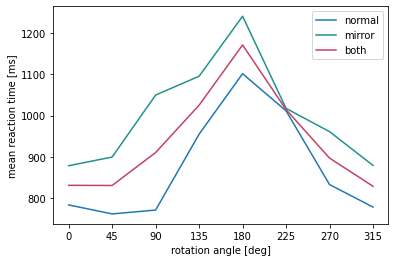

In [ ]:
'''
　　  角度ごとの反応時間の折れ線グラフ

'''

deg_index = ["0", "45", "90", "135", "180", "225", "270", "315"]

df_normal = pd.DataFrame(columns=["normal"], index=deg_index)
df_mirror = pd.DataFrame(columns=["mirror"], index=deg_index)
df_both = pd.DataFrame(columns=["both"], index=deg_index)

mean = dfT.mean(axis=1)
print(mean)

for i in range(len(df_normal)):
  df_normal["normal"][i] = mean[i]
  df_mirror["mirror"][i] = mean[i+8]
  df_both["both"][i] = statistics.mean([mean[i], mean[i+8]])

p_normal = sns.lineplot(data=df_normal, legend="full")
p_mirror = sns.lineplot(data=df_mirror, palette="viridis")
p_both = sns.lineplot(data=df_both, palette="flare")

p_normal.set_xlabel("rotation angle [deg]", fontsize = 10)
p_normal.set_ylabel("mean reaction time [ms]", fontsize = 10)

In [ ]:
'''
　　　　角度ごとの反応時間の折れ線グラフ
　　　　個別に確認

'''

,normal
0,783.020174
45,761.214401
90,770.578896
135,954.818453
180,1101.641033
225,1011.462053
270,832.464387
315,777.772849


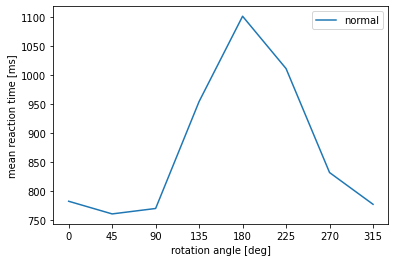

In [ ]:
#正像のみ
p_normal = sns.lineplot(data=df_normal, legend="full")
p_normal.set_xlabel("rotation angle [deg]", fontsize = 10)
p_normal.set_ylabel("mean reaction time [ms]", fontsize = 10)
df_normal.head(10)

,mirror
0,878.196526
45,899.316293
90,1049.791628
135,1095.509968
180,1241.108806
225,1017.331773
270,960.942314
315,878.883184


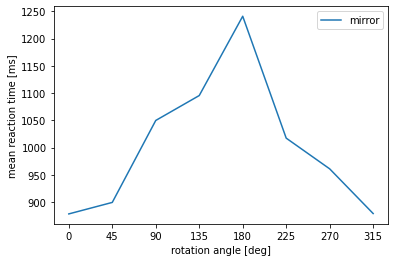

In [ ]:
#鏡像のみ
p_mirror = sns.lineplot(data=df_mirror, legend="full")
p_mirror.set_xlabel("rotation angle [deg]", fontsize = 10)
p_mirror.set_ylabel("mean reaction time [ms]", fontsize = 10)
df_mirror.head(10)

,both
0,830.60835
45,830.265347
90,910.185262
135,1025.16421
180,1171.374919
225,1014.396913
270,896.70335
315,828.328016


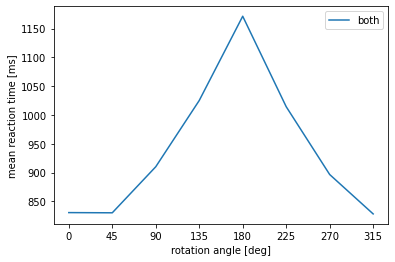

In [ ]:
#正像と鏡像を区別しない
p_both = sns.lineplot(data=df_both, legend="full")
p_both.set_xlabel("rotation angle [deg]", fontsize = 10)
p_both.set_ylabel("mean reaction time [ms]", fontsize = 10)
df_both.head(10)

,normal_0,normal_45,normal_90,normal_135,normal_180,normal_225,normal_270,normal_315,mirror_0,mirror_45,mirror_90,mirror_135,mirror_180,mirror_225,mirror_270,mirror_315
User01,0,0,0,0,3,0,1,0,0,1,1,1,4,3,2,1
User02,0,1,1,2,3,3,1,0,1,1,5,1,1,2,0,2
User03,0,0,1,0,1,2,1,0,0,0,0,0,1,0,1,0
User04,2,2,1,2,3,4,2,3,2,1,1,3,4,2,3,2
User05,0,1,0,0,2,1,1,0,0,0,0,0,4,1,0,0
User06,1,0,0,1,1,0,0,1,0,0,0,2,2,2,1,1
User07,0,0,1,1,1,1,0,0,1,0,0,0,2,1,0,0
User08,0,0,0,0,3,2,0,0,0,0,0,0,1,0,0,1
User09,0,1,0,0,2,1,0,1,0,0,1,0,1,1,0,0
User10,0,0,0,2,3,0,0,0,0,0,0,0,1,0,0,0


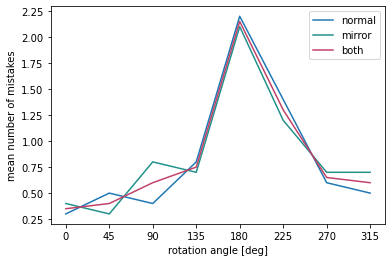

In [ ]:
'''

  ちなみにミスの回数　
  使わなくても良いかもしれないけど、そこそこ綺麗な結果になった

'''
deg_index = ["0", "45", "90", "135", "180", "225", "270", "315"]

df_normal_miss = pd.DataFrame(columns=["normal"], index=deg_index)
df_mirror_miss = pd.DataFrame(columns=["mirror"], index=deg_index)
df_both_miss = pd.DataFrame(columns=["both"], index=deg_index)

mean_miss = df_miss_toCSV.T.mean(axis=1)
# print(mean_miss)

for i in range(len(df_normal_miss)):
  df_normal_miss["normal"][i] = mean_miss[i]
  df_mirror_miss["mirror"][i] = mean_miss[i+8]
  df_both_miss["both"][i] = statistics.mean([mean_miss[i], mean_miss[i+8]])


p_normal = sns.lineplot(data=df_normal_miss, legend="full")
p_mirror = sns.lineplot(data=df_mirror_miss, palette="viridis")
p_both = sns.lineplot(data=df_both_miss, palette="flare")

p_normal.set_xlabel("rotation angle [deg]", fontsize = 10)
p_normal.set_ylabel("mean number of mistakes", fontsize = 10)


df_miss_toCSV.head(10) 